# <center> DENİZ BALCI SİMÜLASYON 1.ÖDEVİ</center>

# 0)  Paket Kurulumu ve Ön açıklama

Bütün hücreleri ayrı ayrı veya bütün halde çalıştırabilirsiniz.İlk olarak paketleri yükleyelim.

In [1]:
!pip install scipy
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## 1)Lineer kongrüans üreteçler

In [2]:
def linearkong(seed,a,b,m):
    generated_numbers=[]
    for i in range(0,m):
      x=(a*seed+b)%m
      seed=x
      generated_numbers.append(seed)
    return generated_numbers

print(linearkong(13,17,0,100))

[21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13]


Ödevimizde 5 kesikli 5 sürekli dağılımın simülasyon hazırlanması istenilmişti.

### 2.Binomdan dağılım üretmek

In [45]:
import numpy as np

# Bernoulli denemesi fonksiyonu

def bernoulli(p):
    x = np.random.uniform(0, 1)
    return 1 if x < p else 0

# Tek bir binom denemesinden başarı sayısını hesaplayan fonksiyon


def binom_value_generator(n, p):
    successes = 0
    for i in range(n):
        successes += bernoulli(p)
    return successes

# Birden fazla binom denemesi sonucu üreten fonksiyon


def binom_generator(n_trials, n, p):
    binomvalues = []
    for i in range(n_trials):
        binomvalues.append(binom_value_generator(n, p))
    return binomvalues


# Test etme
# 20 adet, her biri 10 denemeden oluşan binom verisi üretir
print(binom_generator(20, 10, 0.3))

[2, 4, 4, 2, 3, 1, 4, 3, 7, 4, 4, 4, 4, 1, 1, 1, 0, 5, 4, 6]


# 3.negatif binom

In [82]:
import numpy as np


def geometrik(p):
    U = np.random.uniform(0, 1)
    x = np.ceil(np.log(1 - U) / np.log(1 - p))
    return int(x)

# Negatif binom dağılımından değer üreten fonksiyon


def nbinom_value_generator(k, p):
    trials = 0
    for _ in range(k):
        trials += geometrik(p)
    return trials

# Birden fazla negatif binom dağılımı sonucu üreten fonksiyon


def nbinom_generator(n, k, p):
    nbinom = []
    for _ in range(n):
        nbinom.append(nbinom_value_generator(k, p))
    return nbinom


# Test etme
# 20 adet, her biri 10 başarıya ulaşmak için gereken deneme sayısını üretir
print(nbinom_generator(20, 10, 0.3))



[42, 25, 28, 25, 40, 25, 32, 47, 27, 22, 25, 24, 43, 39, 48, 39, 44, 31, 29, 42]


In [85]:
def lineer_kong(seed,a,b,m):
    generated_number=[]
    for i in range(0,m):
        #a *seed +b nin m ike bölümünden modu
        x=(a*seed+b)%m 
        seed=x
        generated_number.append(x)
    return generated_number


print(lineer_kong(13, 17,0,100))

[21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13, 21, 57, 69, 73, 41, 97, 49, 33, 61, 37, 29, 93, 81, 77, 9, 53, 1, 17, 89, 13]


# Box müller

In [142]:
import numpy as np
import numpy.random as rd
from scipy import stats
import matplotlib.pyplot as plt


def f(theta, E):
    return np.cos(theta) * np.sqrt(2 * E)


def BoxMuller(N, mu=0, sigma=1):
    samples=[]
    for _ in range(N):
        theta = rd.uniform(low=0, high=2 * np.pi, size=1)
        E = rd.exponential(scale=1, size=1)
        X = f(theta, E)[0]
        samples.append(X)
       # out[i] = mu + X * sigma
       

    return samples


def normaldist(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(x - mu)**2 / (2 * sigma**2))



X = BoxMuller(10, mu=0, sigma=1)
print(X)

[0.18590785715595737, -0.2718212101243407, -0.4585234149579512, 0.5855259225371382, -0.3967744962330804, 0.7157360103075071, -2.3542274213342678, 0.2902396493324237, -0.9571133269935647, 1.0455367973231966]


# KABUL RED YÖNTEMİ

In [127]:
import numpy as np
from scipy.special import gamma


def exponential_dist(x, lambdaa):
    return (1 / lambdaa) * np.exp(-x / lambdaa)


def gamma_dist(x, alpha, beta):
    return (1 / gamma(alpha) * (beta ** alpha)) * np.exp(-x / beta) * (x ** (alpha - 1))


def find_c(N, lambdaa):
    datasett = np.random.uniform(0, 1, N)
    generated_values = []
    for i in datasett:
        valuee = gamma_dist(i, 1, 1) / exponential_dist(i, lambdaa)
        generated_values.append(valuee)
    return np.max(generated_values)


kabuldataset = []
n = 100  # Örneklem boyutunu artırdım
for i in range(n):
    v = np.random.exponential(1)
    u = np.random.uniform(0, 1)
    gv = exponential_dist(v, 1)
    fv = gamma_dist(v, 1, 4)
    c = find_c(n, 1)
    value = fv / (c * gv)
    if u < value:
        kabuldataset.append(value)

kabul_orani = len(kabuldataset) / n
print(f"Kabul Oranı: {kabul_orani}")

Kabul Oranı: 0.34


# ADAPTİF KABUL RED

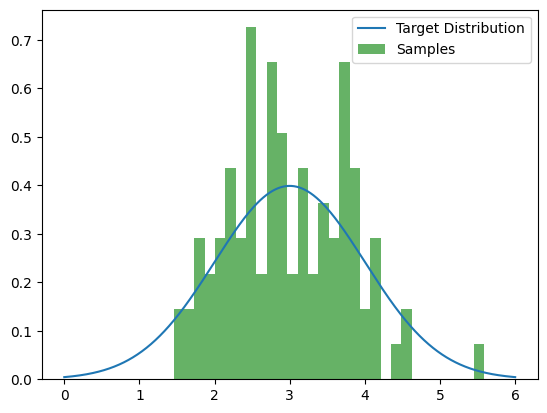

In [151]:
import matplotlib.pyplot as plt
import numpy as np


def target_distribution(x):
    # Hedef dağılımın belirlenmesi, örneğin normal dağılım
    mean = 3
    std_dev = 1
    return np.exp(-0.5 * ((x - mean) / std_dev)**2) / (std_dev * np.sqrt(2 * np.pi))


def sample_from_proposal(proposal_distribution, bounds):
    # Öneri dağılımından bir örnek seçmek için metropolis-hastings yöntemi kullanılıyor.
    x = np.random.uniform(bounds[0], bounds[1])
    y = np.random.uniform(0, proposal_distribution(x))
    if y <= target_distribution(x):
        return x
    return None


def adaptive_rejection_sampling(N, bounds, initial_points):
    # Adaptif reddetme örnekleme algoritması
    samples = []
    support_points = sorted(initial_points)

    W = calculate_piecewise_linear(support_points)

    while len(samples) < N:
        # Öneri dağılımının oluşturulması
        def proposal_distribution(x): return np.exp(-W(x))

        # Öneri dağılımından örnek alınması
        sample = sample_from_proposal(proposal_distribution, bounds)

        if sample is not None:
            samples.append(sample)
            # Reddedilen örneklerin öneri dağılımını güncellemesi
            support_points.append(sample)
            support_points.sort()

        # Güncellenmiş öneri dağılımının hesaplanması
        W = calculate_piecewise_linear(support_points)

    return samples


def calculate_piecewise_linear(support_points):
    # Parçalı doğrusal fonksiyonun hesaplanması
    slopes = []
    intercepts = []

    for i in range(1, len(support_points)):
        x1, x2 = support_points[i-1], support_points[i]
        m = (target_distribution(x2) - target_distribution(x1)) / (x2 - x1)
        b = target_distribution(x1) - m * x1
        slopes.append(m)
        intercepts.append(b)

    return lambda x: min(m * x + b for m, b in zip(slopes, intercepts))


# Örnek kullanım
N = 100  # Kaç tane örnek alınacağı
bounds = (0, 6)  # Örnekleme alanının sınırları
initial_points = [1, 2, 4, 5]  # Başlangıç noktaları

samples = adaptive_rejection_sampling(N, bounds, initial_points)

# Örneklerin görselleştirilmesi

x = np.linspace(bounds[0], bounds[1], 1000)
plt.plot(x, target_distribution(x), label='Target Distribution')
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Samples')
plt.legend()
plt.show()